### Evaluating - using metrics
* <b>Confusion matrix</b> - visually inspect quality of a classifier's predictions (more [here](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)) - very useful to see if a particular class is problematic

<b>Here, we will process some data, classify it with SVM (see [here](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) for more info), and view the quality of the classification with a confusion matrix.</b>

In [38]:
import numpy as np

# import model algorithm and data
from sklearn import svm, datasets

# import splitter
from sklearn.cross_validation import train_test_split

# import metrics
from sklearn.metrics import confusion_matrix

# feature data (X) and labels (y)
iris = datasets.load_iris()
X, y = iris.data, iris.target

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, random_state = 42)

In [39]:
# perform the classification step and run a prediction on test set from above
clf = svm.SVC(kernel = 'linear', C = 0.01)
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [40]:
# Define a plotting function confusion matrices 
#  (from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, target_names, title = 'The Confusion Matrix', cmap = plt.cm.YlOrRd):
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.tight_layout()
    
    # Add feature labels to x and y axes
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    plt.colorbar()

Numbers in confusion matrix:
* on-diagonal - counts of points for which the predicted label is equal to the true label
* off-diagonal - counts of mislabeled points

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


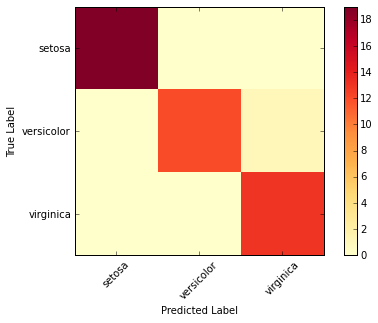

In [41]:
%matplotlib inline

cm = confusion_matrix(y_test, y_pred)

# see the actual counts
print(cm)

# visually inpsect how the classifier did matching predictions to true labels
plot_confusion_matrix(cm, iris.target_names)

* <b>Classification reports</b> - a text report with important classification metrics (e.g. precision, recall)

In [42]:
from sklearn.metrics import classification_report

# Using the test and prediction sets from above
print(classification_report(y_test, y_pred, target_names = iris.target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        19
 versicolor       1.00      0.92      0.96        13
  virginica       0.93      1.00      0.96        13

avg / total       0.98      0.98      0.98        45



In [43]:
# Another example with some toy data

y_test = ['cat', 'dog', 'mouse', 'mouse', 'cat', 'cat']
y_pred = ['mouse', 'dog', 'cat', 'mouse', 'cat', 'mouse']

# How did our predictor do?
print(classification_report(y_test, y_pred, target_names = y_test))

             precision    recall  f1-score   support

        cat       0.50      0.33      0.40         3
        dog       1.00      1.00      1.00         1
      mouse       0.33      0.50      0.40         2

avg / total       0.53      0.50      0.50         6



### Evaluating Models and Under/Over-Fitting
* Over-fitting or under-fitting can be visualized as below and tuned as we will see later with `GridSearchCV` paramter tuning
* A <b>validation curve</b> gives one an idea of the relationship of model complexity to model performance.
* For this examination it would help to understand the idea of the [<b>bias-variance tradeoff</b>](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).
* A <b>learning curve</b> helps answer the question of if there is an added benefit to adding more training data to a model.  It is also a tool for investigating whether an estimator is more affected by variance error or bias error.

In [ ]:
import numpy as np
from sklearn import cross_validation

# Let's run a prediction on some test data given a trained model

# First, create some data
X = np.sort(np.random.rand(20))
func = lambda x: np.cos(1.5 * np.pi * x)
y = np.array([func(x) for x in X])

In [ ]:
# A plotting function

import matplotlib.pyplot as plt
%matplotlib inline

def plot_fit(X_train, y_train, X_test, y_pred):
    plt.plot(X_test, y_pred, label = "Model")
    plt.plot(X_test, func(X_test), label = "Function")
    plt.scatter(X_train, y_train,  label = "Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))